In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86

In [3]:
df.describe()

age          bmi     children      expenses
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.665471     1.094918  13270.422414
std      14.049960     6.098382     1.205493  12110.011240
min      18.000000    16.000000     0.000000   1121.870000
25%      27.000000    26.300000     0.000000   4740.287500
50%      39.000000    30.400000     1.000000   9382.030000
75%      51.000000    34.700000     2.000000  16639.915000
max      64.000000    53.100000     5.000000  63770.430000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.duplicated().sum()

1

In [6]:
df[df.duplicated(keep=False)]

age   sex   bmi  children smoker     region  expenses
195   19  male  30.6         0     no  northwest   1639.56
581   19  male  30.6         0     no  northwest   1639.56

In [7]:
df = df.drop_duplicates()

In [8]:
df.isna().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
expenses    False
dtype: bool

In [9]:
df["sex"].value_counts(normalize=True)

male      0.504862
female    0.495138
Name: sex, dtype: float64

In [10]:
df["region"].value_counts(normalize=True)

southeast    0.272251
southwest    0.243082
northwest    0.242334
northeast    0.242334
Name: region, dtype: float64

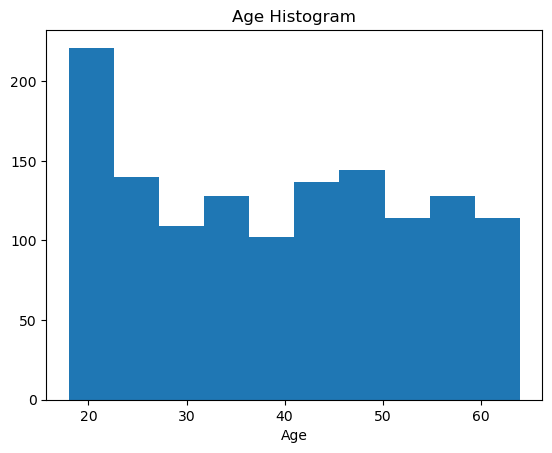

In [11]:
plt.hist(df["age"])
plt.xlabel("Age")
plt.title("Age Histogram")
plt.show()

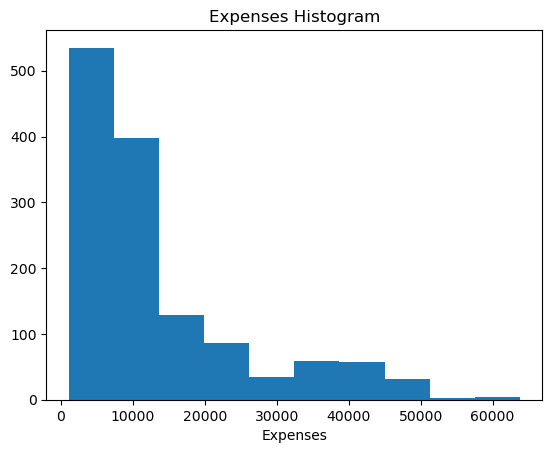

In [12]:
plt.hist(df["expenses"])
plt.xlabel("Expenses")
plt.title("Expenses Histogram")
plt.show()

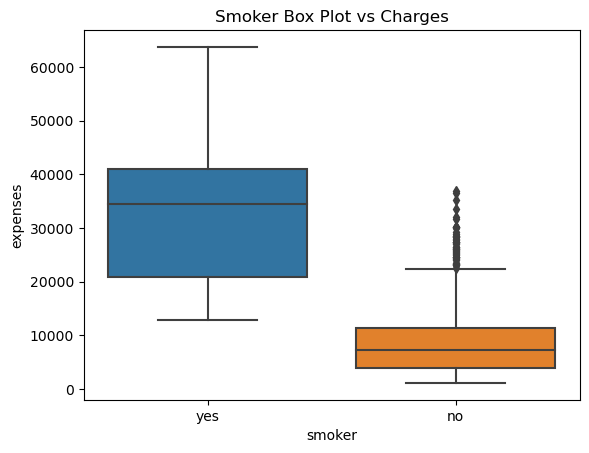

In [13]:
sns.boxplot(x= df["smoker"], y = df["expenses"])
plt.title("Smoker Box Plot vs Charges")
plt.show()

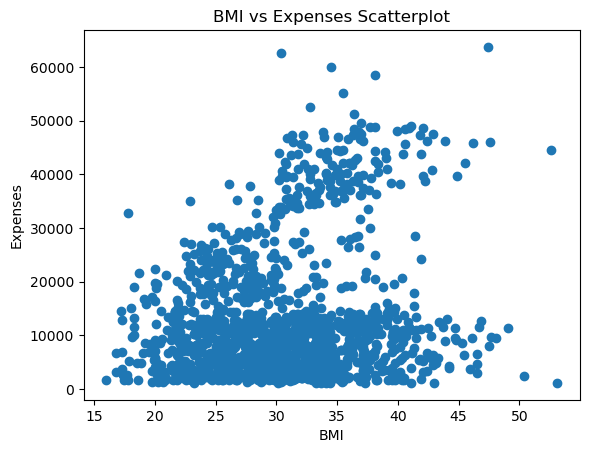

In [14]:
plt.scatter(x=df["bmi"], y=df["expenses"])
plt.xlabel("BMI")
plt.ylabel("Expenses")
plt.title("BMI vs Expenses Scatterplot")
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

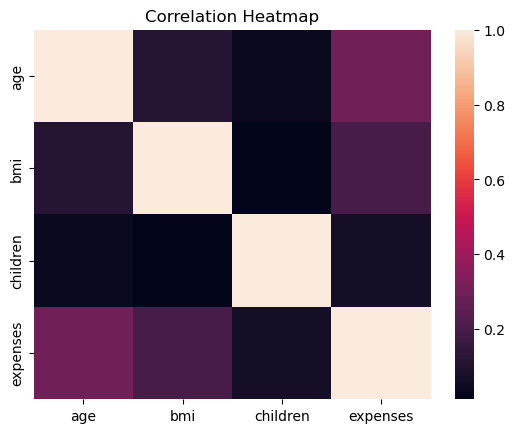

In [15]:
sns.heatmap(df.corr())
plt.title("Correlation Heatmap")

In [16]:
# split the dataset

X = df.drop(columns = "expenses", axis = 1)
y = df["expenses"]

In [17]:
# split into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [18]:
# prepare columns transformers for numeric and categorical columns

numeric_features = X_train.select_dtypes(include = ["int64", "float64"]).columns.to_list()
categorical_features = X_train.select_dtypes(include = ["object"]).columns.to_list()

numeric_transformer = Pipeline(steps = [('scalar', StandardScaler())])
categorical_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [19]:
# begin fitting the actaul model pipeline
# I really want to use the Logistic Regression

model = LinearRegression()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

param_grid = {
    'model__fit_intercept': [True, False]
}

grid = GridSearchCV(pipeline, param_grid, cv = 5, n_jobs=-1, scoring = 'accuracy', verbose = True)

In [20]:
# fit the grid search model

grid.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


/Users/dawsontam/miniforge3/envs/dsc80/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dawsontam/miniforge3/envs/dsc80/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dawsontam/miniforge3/envs/dsc80/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/dawsontam/miniforge3/envs/dsc80/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dawsontam/miniforge3/envs/dsc80/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  Fil

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scalar',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'bmi',
                                                                          'children']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                       

In [21]:
#calcualte the losses for this model 
y_pred_lr = grid.predict(X_test)

lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
lr_r2 = r2_score(y_test, y_pred_lr)

print("MAE: " + str(mean_absolute_error(y_test, y_pred_lr)))
print("MSE: " + str(mean_squared_error(y_test, y_pred_lr)))
print("RMSE: " + str(np.sqrt(mean_squared_error(y_test, y_pred_lr))))
print("R2: " + str(r2_score(y_test, y_pred_lr)))

MAE: 4195.927798507462
MSE: 35749050.49004738
RMSE: 5979.050969012338
R2: 0.8054537693273265


In [22]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

param_grid = {
    'model__n_estimators': [50, 100, 200],  
    'model__max_depth': [None, 10, 20, 30],  
    'model__min_samples_split': [2, 5, 10],  
    'model__min_samples_leaf': [1, 2, 4],    
    'model__max_features': ['auto', 'sqrt', 'log2'],  
    'model__bootstrap': [True, False],       
    'model__n_jobs': [-1, 1],       
}

grid = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=1, scoring='accuracy', verbose=1)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


/Users/dawsontam/miniforge3/envs/dsc80/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dawsontam/miniforge3/envs/dsc80/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dawsontam/miniforge3/envs/dsc80/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/dawsontam/miniforge3/envs/dsc80/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dawsontam/miniforge3/envs/dsc80/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  Fil

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scalar',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'bmi',
                                                                          'children']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                       

In [23]:

y_pred_rf = grid.predict(X_test)

rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_r2 = r2_score(y_test, y_pred_rf)

print("MAE: " + str(mean_absolute_error(y_test, y_pred_rf)))
print("MSE: " + str(mean_squared_error(y_test, y_pred_rf)))
print("RMSE: " + str(np.sqrt(mean_squared_error(y_test, y_pred_rf))))
print("R2: " + str(r2_score(y_test, y_pred_rf)))

MAE: 2582.4362373134327
MSE: 21693129.816029616
RMSE: 4657.588412046476
R2: 0.8819460494936364


In [24]:
import xgboost as xgb

model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

param_grid = {
    'model__n_estimators': [50, 100, 200],  
    'model__max_depth': [None, 10, 20, 30]
}

grid = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=1, scoring='accuracy', verbose=1)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/Users/dawsontam/miniforge3/envs/dsc80/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dawsontam/miniforge3/envs/dsc80/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dawsontam/miniforge3/envs/dsc80/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/dawsontam/miniforge3/envs/dsc80/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dawsontam/miniforge3/envs/dsc80/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  Fil

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scalar',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'bmi',
                                                                          'children']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                       

In [25]:
y_pred_xgb = grid.predict(X_test)

xgb_mae = mean_absolute_error(y_test, y_pred_xgb)
xgb_mse = mean_squared_error(y_test, y_pred_xgb)
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
xgb_r2 = r2_score(y_test, y_pred_xgb)

print("MAE: " + str(mean_absolute_error(y_test, y_pred_xgb)))
print("MSE: " + str(mean_squared_error(y_test, y_pred_xgb)))
print("RMSE: " + str(np.sqrt(mean_squared_error(y_test, y_pred_xgb))))
print("R2: " + str(r2_score(y_test, y_pred_xgb)))

MAE: 2420.1192724973766
MSE: 19147689.392314266
RMSE: 4375.80728464066
R2: 0.8957983290100823


In [28]:
results = {
    "Model": ["Linear Regression", "Random Forest", "XGBoost"],
    "MAE": [lr_mae, rf_mae, xgb_mae],
    "MSE": [lr_mse, rf_mse, xgb_mse],
    "RMSE": [lr_rmse, rf_rmse, xgb_rmse],
    "R² Score": [lr_r2, rf_r2, xgb_r2]
}

results_df = pd.DataFrame(results)

print(results_df)

               Model          MAE           MSE         RMSE  R² Score
0  Linear Regression  4195.927799  3.574905e+07  5979.050969  0.805454
1      Random Forest  2582.436237  2.169313e+07  4657.588412  0.881946
2            XGBoost  2420.119272  1.914769e+07  4375.807285  0.895798


# Summary of Results:

XGBoost is the best-performing model across all metrics:

It has the lowest MAE, MSE, and RMSE, indicating the smallest average error and the most consistent performance.

It also has the highest R² score, explaining the most variance in the data.

Random Forest also performs well, with relatively low MAE, MSE, and RMSE values, and a good R² score. It is slightly less accurate than XGBoost but still outperforms Linear Regression.

Linear Regression shows the highest error values across the board, indicating it is the least accurate among the three models. However, it is a simpler model, and while it performs worse than the other two, it might still be useful in situations where interpretability or simplicity is a priority.

## Conclusion:

Best Model: XGBoost (most accurate, lowest error, highest R² score)

Second Best: Random Forest (slightly less accurate than XGBoost, but still a very good model)

Least Accurate: Linear Regression (higher error metrics and lower R² score)